In [39]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [74]:
df = pd.read_csv('/home/bob/CDD/monoamine oxidase b_06_Model ready.csv')

In [75]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4775,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4776,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4777,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [76]:
Y = df.pIC50
Y

0       3.000000
1       3.000000
2       7.744727
3       8.045757
4       8.356547
          ...   
4774    4.074688
4775    4.481486
4776    6.187087
4777    4.602060
4778    4.100000
Name: pIC50, Length: 4779, dtype: float64

In [77]:
X.shape

(4779, 881)

In [78]:
Y.shape

(4779,)

In [79]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,...,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821
0,0,0,0,0,0,1,1,1,1,0,...,0,0,1,0,0,1,0,1,0,0
1,1,0,1,1,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,1,1,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,1,1,1,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,0,0,0,0,0,1,1,1,0,0,...,0,0,1,0,0,1,1,0,1,0
4775,1,1,1,0,0,1,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4776,1,1,1,0,0,1,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4777,1,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,1,1,1,1,0


In [80]:
X.to_csv('descriptor_list.csv', index = False)

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state =42)

In [82]:
X_train.shape, Y_train.shape

((3823, 241), (3823,))

In [83]:
X_test.shape, Y_test.shape

((956, 241), (956,))

In [84]:
import numpy as np
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [85]:
Y_pred = model.predict(X_test)

In [86]:
r2_train = model.score(X_train, Y_train)
r2_train

0.8618768341460037

In [87]:
r2_test = model.score(X_test, Y_test)
r2_test

0.43797850470956057

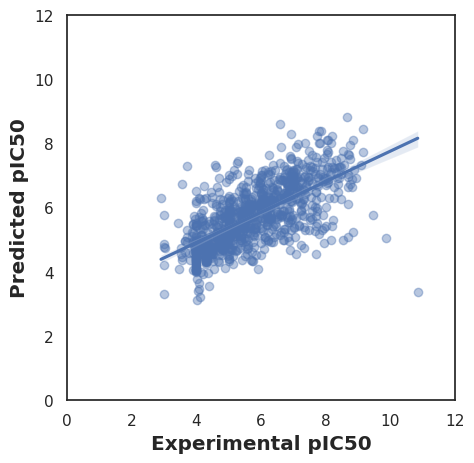

In [88]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

# Don't forget to call plt.show()
plt.show()

In [89]:
import pickle
pickle.dump(model, open('/home/bob/CDD/Model/monoamine_oxidase_bioactivity_model.pkl', 'wb'))